Start Time: Tue, Jun 20, 2023 @ 11:54 AM
Title: 20 min 70s Pop Ride
                           output
2023-06-20 11:54:14-04:00      80
2023-06-20 11:54:19-04:00      22
2023-06-20 11:54:24-04:00      66
2023-06-20 11:54:29-04:00      77
2023-06-20 11:54:34-04:00      78
...                           ...
2023-06-20 12:13:54-04:00      83
2023-06-20 12:13:59-04:00      85
2023-06-20 12:14:04-04:00      85
2023-06-20 12:14:09-04:00      88
2023-06-20 12:14:14-04:00      85

[241 rows x 1 columns]
                           cadence
2023-06-20 11:54:14-04:00       86
2023-06-20 11:54:19-04:00       40
2023-06-20 11:54:24-04:00       80
2023-06-20 11:54:29-04:00       84
2023-06-20 11:54:34-04:00       85
...                            ...
2023-06-20 12:13:54-04:00       86
2023-06-20 12:13:59-04:00       86
2023-06-20 12:14:04-04:00       86
2023-06-20 12:14:09-04:00       88
2023-06-20 12:14:14-04:00       86

[241 rows x 1 columns]
                           resistance
2023-06-20 11:54:1

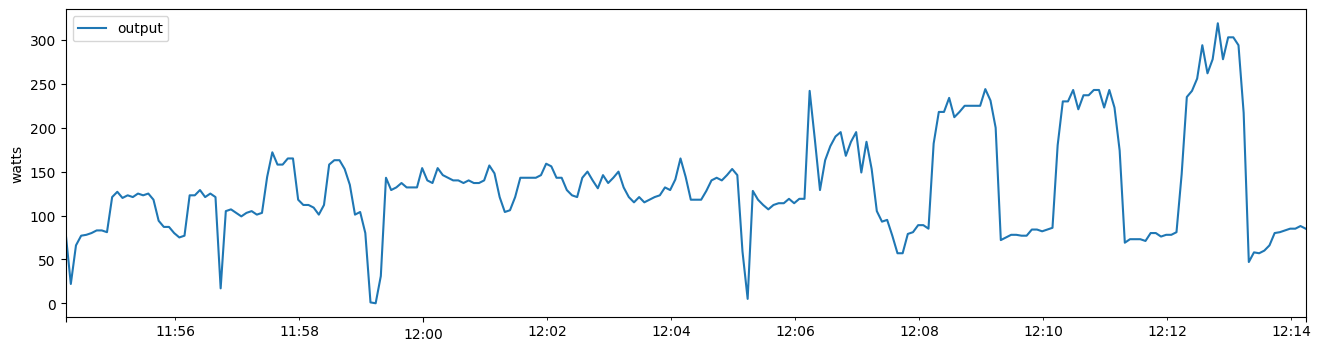

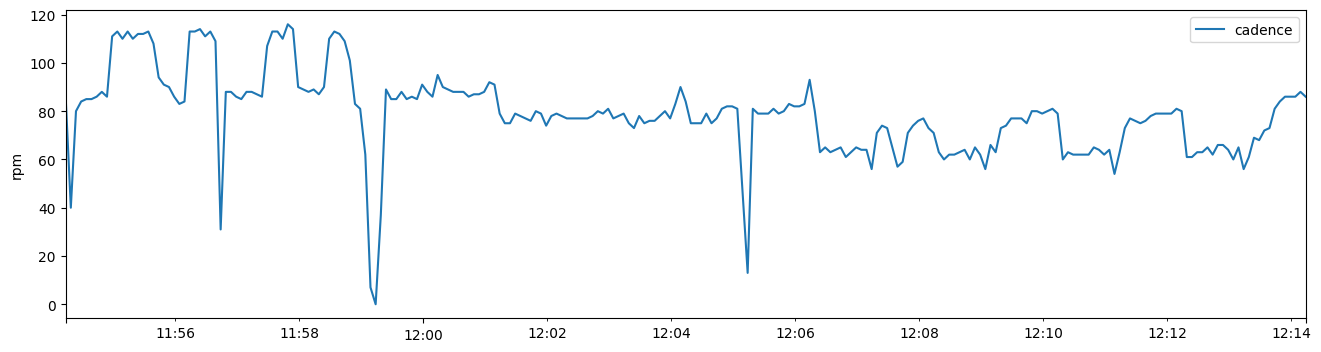

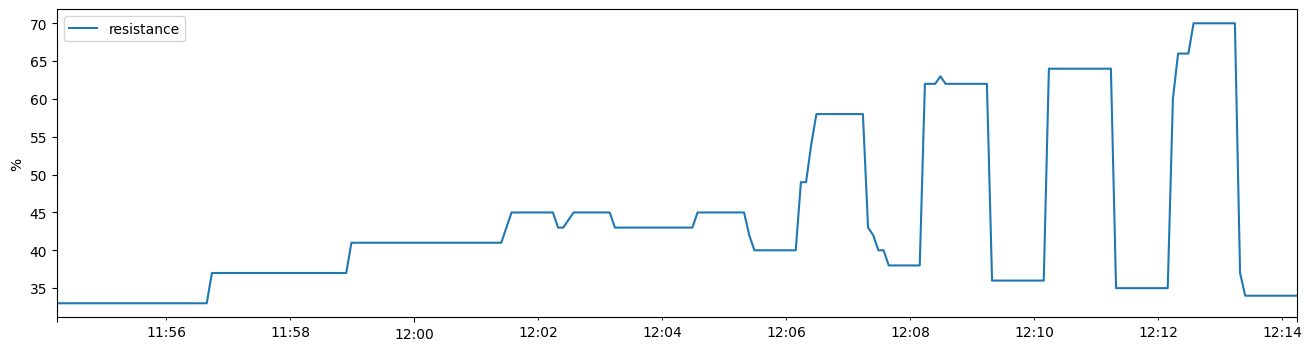

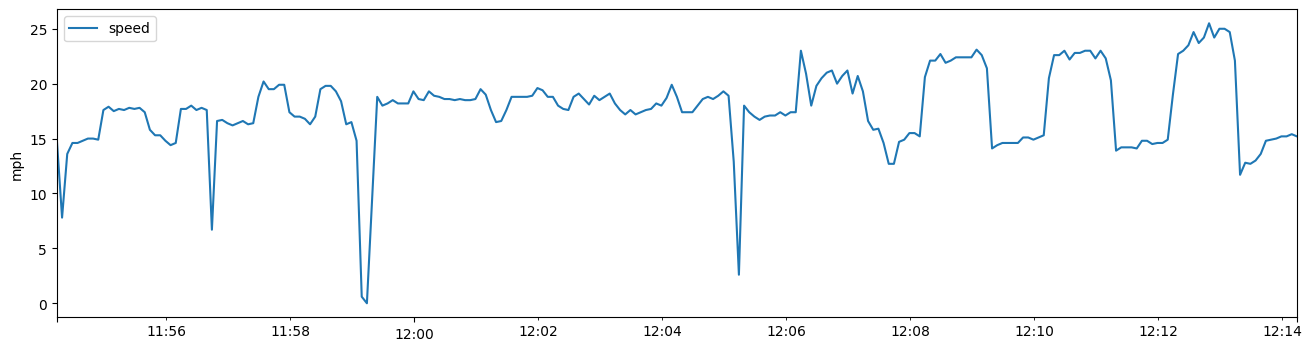

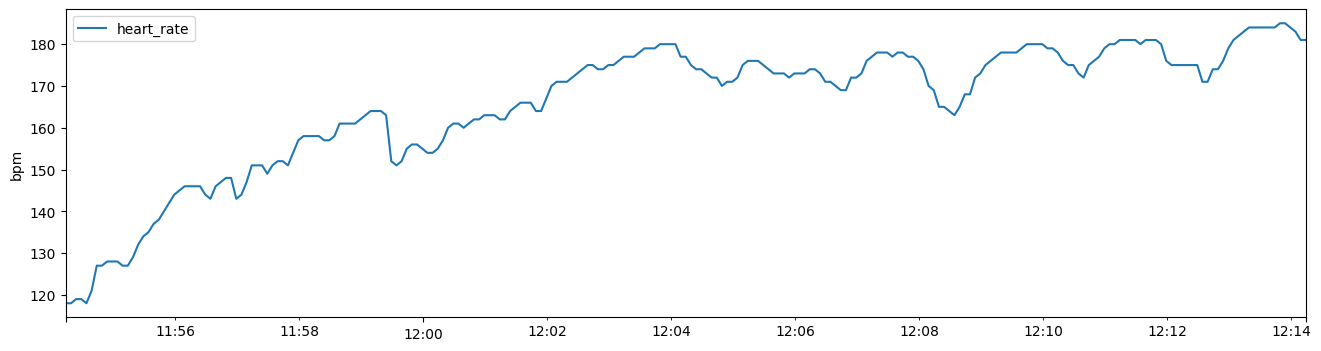

In [3]:
from peloton import PelotonProcessor
import pandas as pd
from datetime import timedelta
import random

pd.set_option('plotting.backend', 'matplotlib')

processor = PelotonProcessor()

workout = processor.workouts[random.randint(0, len(processor.workouts))]

metrics = {'output': 'watts',
           'cadence': 'rpm',
           'resistance': '%',
           'speed': 'mph',
           'heart_rate': 'bpm'}

print(f"Start Time: {workout.summary.start_time.strftime('%a, %b %-d, %Y @ %-I:%M %p')}")
print(f"Title: {workout.summary.ride.title}")

for x in range(len(workout.metrics.metrics)):
    if x == 4:
        print(workout.metrics.metrics[x].values)
        values = list(map(lambda x: max(100, x), workout.metrics.metrics[x].values))
        print(values)
    else:
        values = workout.metrics.metrics[x].values
    slug = workout.metrics.metrics[x].slug
    df = pd.DataFrame(
        {slug: values},
        index = [(workout.summary.start_time + timedelta(seconds=(x)))
                 for x in range(0, (5 * len(workout.metrics.metrics[x].values)), 5)]
    )
    # df.plot()
    print(df)
    df.plot(figsize=(16, 4), ylabel=metrics[slug])

